In [46]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

In [4]:
(x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data();

170498071/170498071 [==============================] - 493s 3us/step


In [6]:
x_train.shape

(50000, 32, 32, 3)

In [7]:
x_train=x_train/255
x_test=x_test/255

In [8]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [9]:
y_train=y_train.reshape(-1,)

In [36]:
cnn = models.Sequential([
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
     
    layers.Dense(10, activation='softmax')
])

In [39]:
cnn.compile(optimizer='adam',
           loss='sparse_categorical_crossentropy',
            metrics=['accuracy']
           )


In [40]:
cnn.fit(x_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 29s 18ms/step - loss: 1.4531 - accuracy: 0.4760
Epoch 2/10
1563/1563 [==============================] - 30s 19ms/step - loss: 1.1081 - accuracy: 0.6118
Epoch 3/10
1563/1563 [==============================] - 29s 19ms/step - loss: 0.9836 - accuracy: 0.6583
Epoch 4/10
1563/1563 [==============================] - 29s 19ms/step - loss: 0.9024 - accuracy: 0.6854
Epoch 5/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.8323 - accuracy: 0.7105
Epoch 6/10
1563/1563 [==============================] - 29s 18ms/step - loss: 0.7781 - accuracy: 0.7271
Epoch 7/10
1563/1563 [==============================] - 29s 18ms/step - loss: 0.7317 - accuracy: 0.7459
Epoch 8/10
1563/1563 [==============================] - 38s 24ms/step - loss: 0.6852 - accuracy: 0.7612
Epoch 9/10
1563/1563 [==============================] - 34s 22ms/step - loss: 0.6489 - accuracy: 0.7718
Epoch 10/10
1563/1563 [==============================] - 28s 18m

In [45]:
cnn.evaluate(x_test,y_test);

313/313 [==============================] - 2s 5ms/step - loss: 0.9375 - accuracy: 0.6907


In [42]:
cnn.save('image.calsifer.cnn')

INFO:tensorflow:Assets written to: image.calsifer.cnn\assets


INFO:tensorflow:Assets written to: image.calsifer.cnn\assets


In [43]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

1/1 [==============================] - 0s 16ms/step
airplane


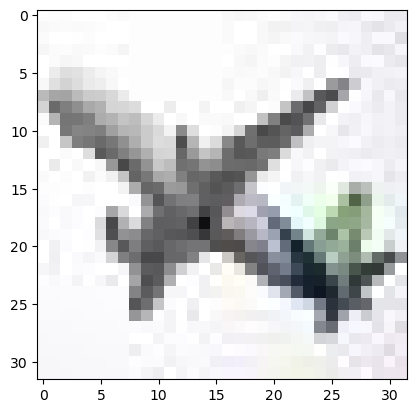

In [66]:
img=cv.imread('23.jpg')
img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
plt.imshow(img,cmap=plt.cm.binary)

prediction=cnn.predict(np.array([img])/255)
print(classes[np.argmax(prediction)])